In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline

In [2]:
df=pd.read_csv(r"ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:

print(df.shape)

(2111, 17)


In [5]:
df[df.isnull().any(axis=1)]


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


# For missing values

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [9]:
print("numerical_columns:",numerical_columns)
print("categorical_columns:",categorical_columns)

numerical_columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
categorical_columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


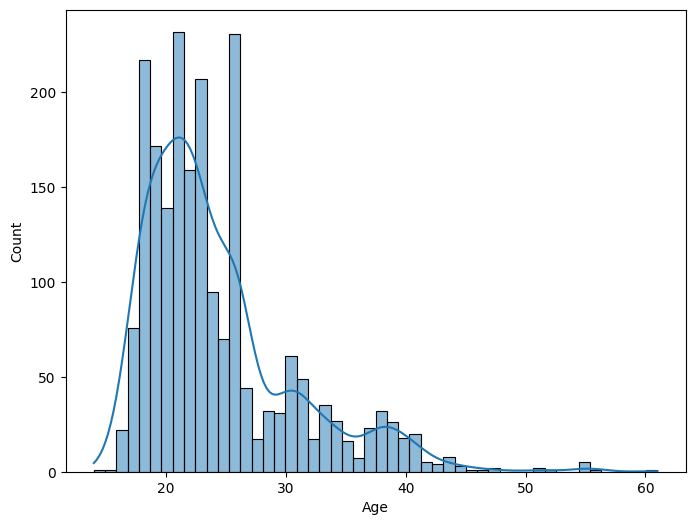

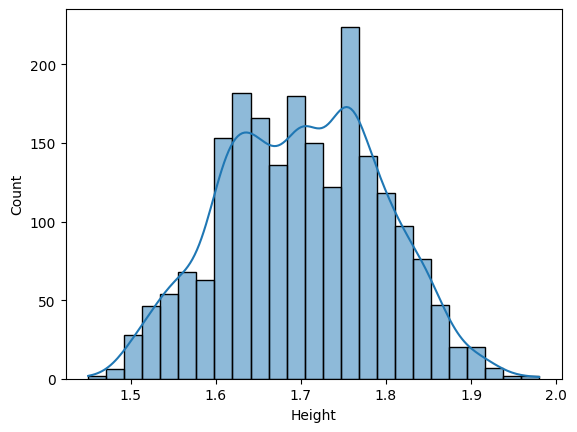

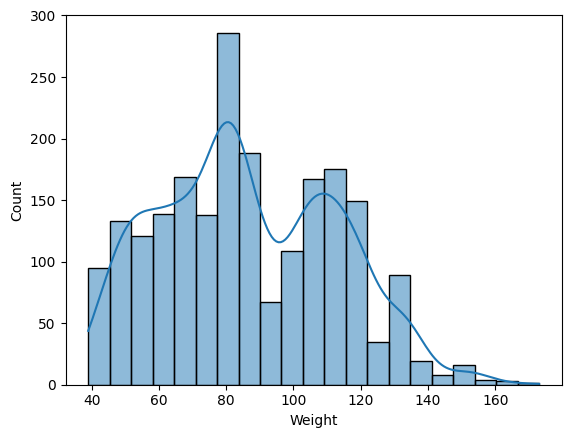

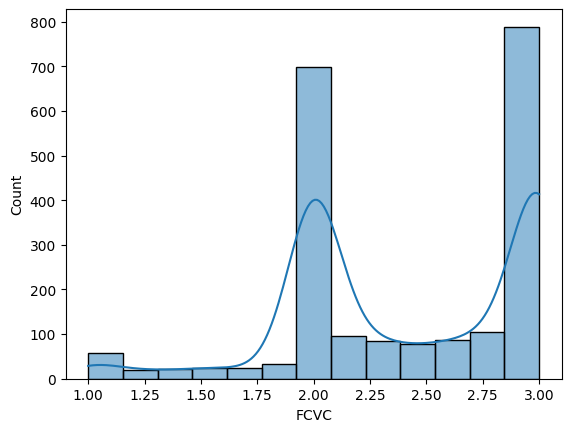

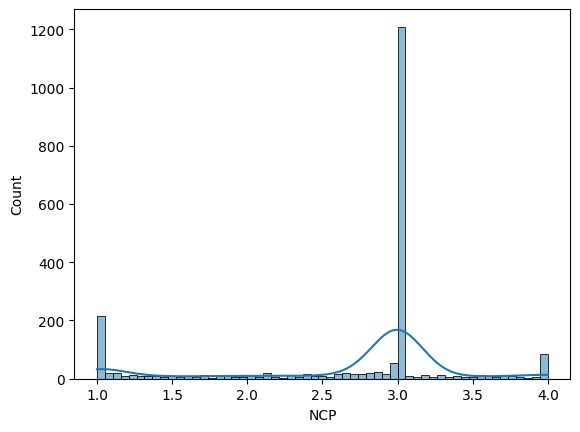

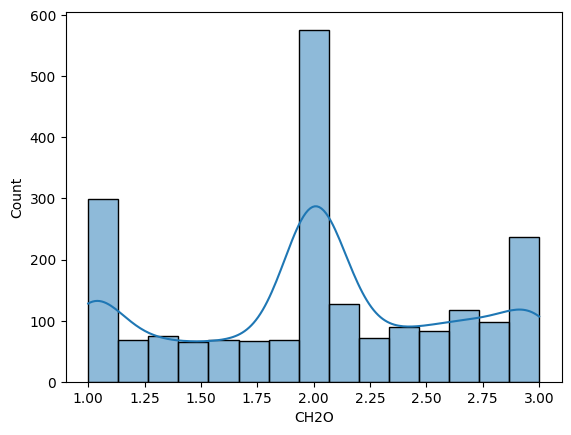

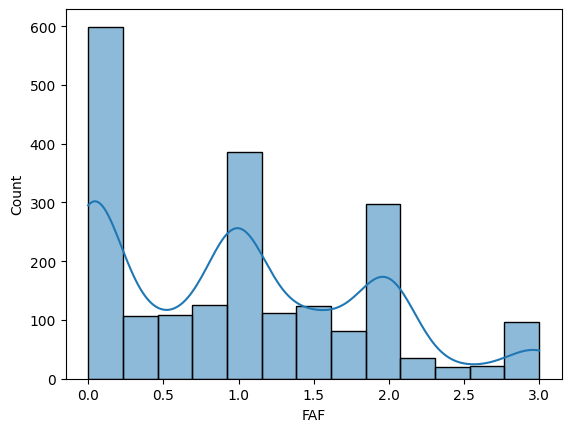

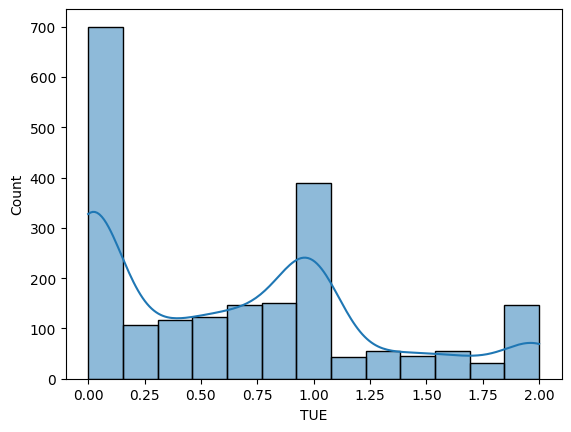

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 800x600 with 0 Axes>

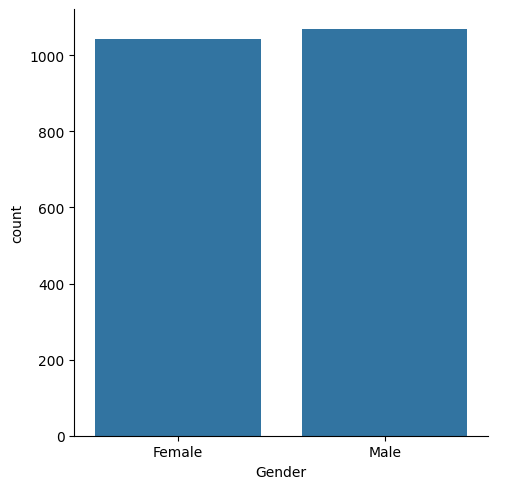

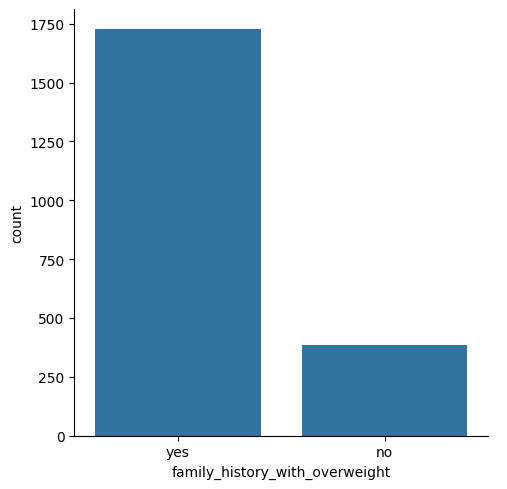

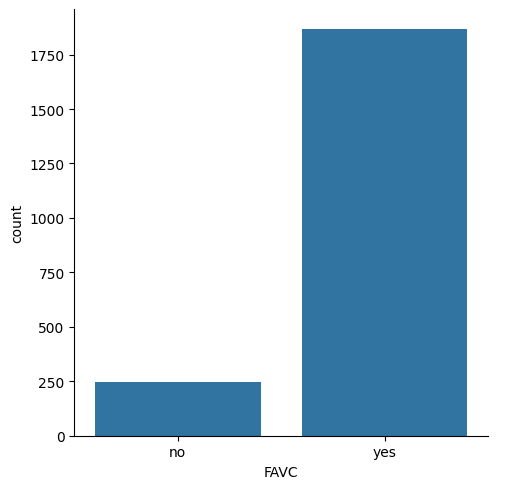

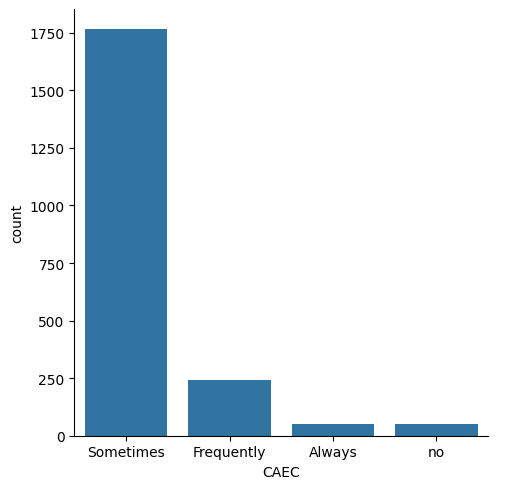

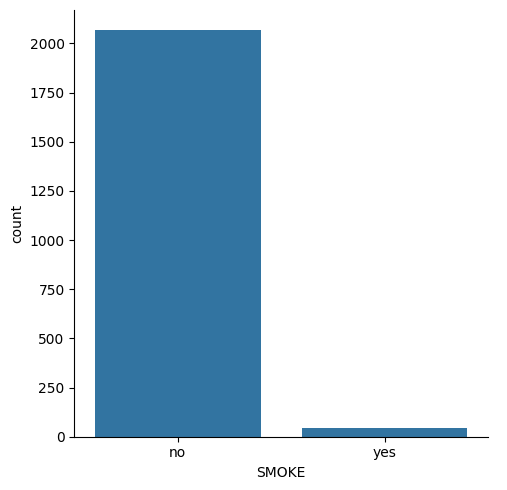

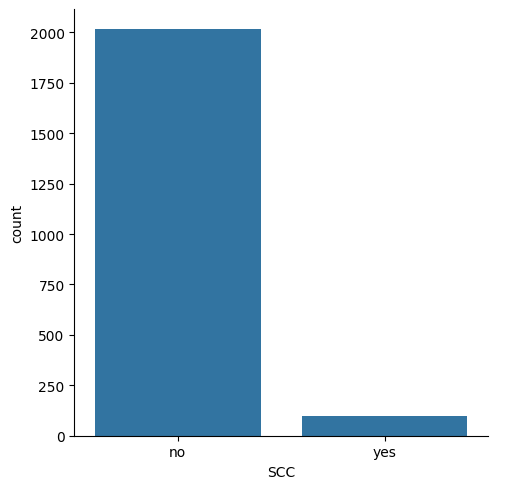

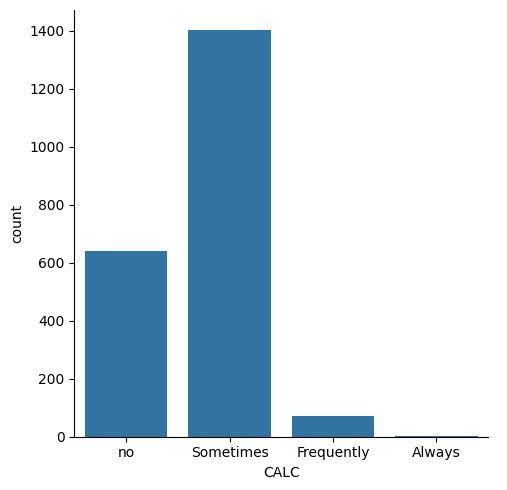

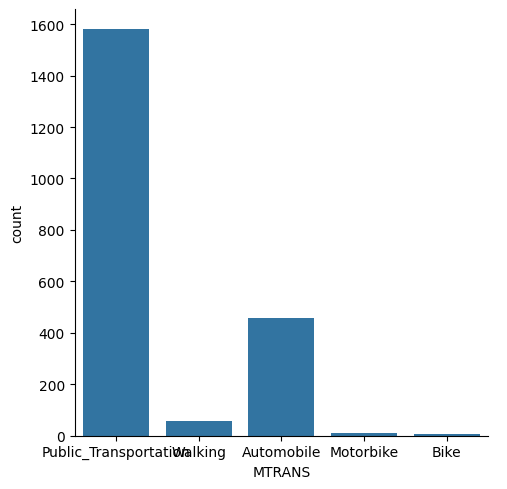

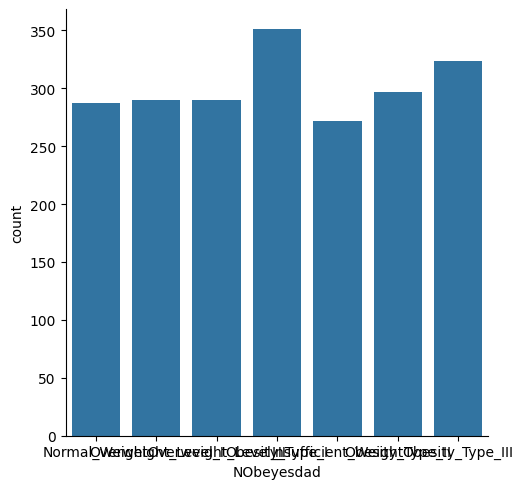

In [11]:
plt.figure(figsize=(8,6))
for i in categorical_columns:
    sns.catplot(data=df,x=i,kind='count')
    print('\n')
    plt.show()

<Axes: >

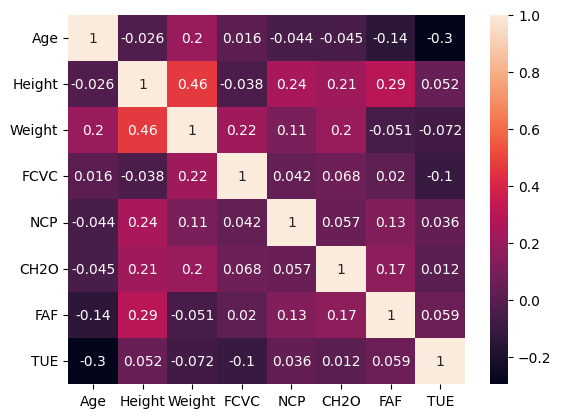

In [12]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [13]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [14]:
for i in categorical_columns:
  print(i)

Gender
family_history_with_overweight
FAVC
CAEC
SMOKE
SCC
CALC
MTRANS
NObeyesdad


In [15]:
for i in categorical_columns:
  print(df[i].value_counts())
  print()
  print('---------------------')
  print()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

---------------------

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

---------------------

FAVC
yes    1866
no      245
Name: count, dtype: int64

---------------------

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

---------------------

SMOKE
no     2067
yes      44
Name: count, dtype: int64

---------------------

SCC
no     2015
yes      96
Name: count, dtype: int64

---------------------

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

---------------------

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

---------------------

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight

In [16]:
for i in numerical_columns:
  print(df[i].value_counts())
  print()
  print('---------------------')
  print()

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

---------------------

Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64

---------------------

Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64

---------------------

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

---------------------

NCP
3.0

In [17]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [18]:
X=df.drop(['NObeyesdad'],axis=1)
Y=df[['NObeyesdad']]

In [19]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [20]:
Y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [21]:
NObeyesdad_cat=['Obesity_Type_I','Obesity_Type_III','Obesity_Type_II','Overweight_Level_I','Overweight_Level_II','Normal_Weight','Insufficient_Weight']

In [22]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [23]:
categorical_cols


Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [24]:
numerical_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [25]:
Gender_cat=['Male','Female']
family_history_with_overweight_cat=['yes','no']
FAVC_cat=['yes','no']
CAEC_cat=[ 'Sometimes','no','Frequently','Always']
SMOKE_cat=['yes','no']
SCC_cat=['yes','no']
CALC_cat=[ 'Sometimes','no','Frequently','Always']
MTRANS_cat=['Public_Transportation','Automobile','Walking','Motorbike','Bike']
NObeyesdad_cat=['Obesity_Type_I','Obesity_Type_III','Obesity_Type_II','Overweight_Level_I','Overweight_Level_II','Normal_Weight','Insufficient_Weight']

In [26]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [27]:
w = [{
    "Gender": 'Female',
    "Age": 21,
    "Height":1.62,
    "Weight":50,
    "family_history_with_overweight":'yes',
    "FAVC": 'no',
    "FCVC": 2.0,
    "NCP": 3.0,
    "CAEC": 'Sometimes',
    "SMOKE": 'no',
    "CH2O": 2.0,
    "SCC": 'no',
    "FAF": 0.0,
    "TUE": 1.0,
    "CALC": 'Sometimes',  # Corrected value
    "MTRANS": 'Public_Transportation'
}]

In [28]:
f=pd.DataFrame(w)

In [29]:
f

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.62,50,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,Sometimes,Public_Transportation


In [30]:
def Transform_data(fr,df):

  X=df.drop(['NObeyesdad'],axis=1)
  Y=df[['NObeyesdad']]

  numerical_cols=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
  categorical_cols=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']



  Gender_cat=['Male','Female']
  family_history_with_overweight_cat=['yes','no']
  FAVC_cat=['yes','no']
  CAEC_cat=[ 'Sometimes','no','Frequently','Always']
  SMOKE_cat=['yes','no']
  SCC_cat=['yes','no']
  CALC_cat=[ 'Sometimes','no','Frequently','Always']
  MTRANS_cat=['Public_Transportation','Automobile','Walking','Motorbike','Bike']




  ## Numerical Pipeline
  num_pipeline=Pipeline(
      steps=[
     ('imputer',SimpleImputer(strategy='median')),
     ('scaler',StandardScaler())

     ]

  )

# Categorigal Pipeline
  cat_pipeline=Pipeline(
      steps=[
      ('imputer',SimpleImputer(strategy='most_frequent')),
      ('ordinalencoder',OrdinalEncoder(categories=[Gender_cat,family_history_with_overweight_cat,FAVC_cat,CAEC_cat,SMOKE_cat,SCC_cat,CALC_cat,MTRANS_cat])),
      ('scaler',StandardScaler())
      ]

  )

  preprocessor=ColumnTransformer([
  ('num_pipeline',num_pipeline,numerical_cols),
  ('cat_pipeline',cat_pipeline,categorical_cols)
  ])



  X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)
  X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
  X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())


  c = pd.DataFrame(preprocessor.transform(fr), columns=preprocessor.get_feature_names_out())

  return pd.DataFrame(c)




In [31]:
print(Transform_data(f,df))

   num_pipeline__Age  num_pipeline__Height  num_pipeline__Weight  \
0          -0.507814             -0.877049             -1.383395   

   num_pipeline__FCVC  num_pipeline__NCP  num_pipeline__CH2O  \
0           -0.791612           0.406076           -0.040542   

   num_pipeline__FAF  num_pipeline__TUE  cat_pipeline__Gender  \
0          -1.179455           0.564702              1.006112   

   cat_pipeline__family_history_with_overweight  cat_pipeline__FAVC  \
0                                     -0.469746            2.727636   

   cat_pipeline__CAEC  cat_pipeline__SMOKE  cat_pipeline__SCC  \
0           -0.406381              0.13901           0.228023   

   cat_pipeline__CALC  cat_pipeline__MTRANS  
0           -0.676129             -0.525697  


# Mode Training

In [37]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Gender_cat,family_history_with_overweight_cat,FAVC_cat,CAEC_cat,SMOKE_cat,SCC_cat,CALC_cat,MTRANS_cat])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd



In [39]:
## Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [42]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [43]:
clk=RandomForestClassifier(random_state=2020)

In [44]:
clk.fit(X_train,y_train)

<ipython-input-44-480ef6e38ff9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clk.fit(X_train,y_train)


RandomForestClassifier(random_state=2020)

In [46]:
y_predict=clk.predict(X_test)

In [47]:
y_predict

array(['Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_III',
       'Obesity_Type_II', 'Obesity_Type_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_I', 'Normal_Weight',
       'Normal_Weight', 'Obesity_Type_II', 'Overweight_Level_II',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III',
       'Normal_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Overweight_Level_II', 'Overweight_Level_I', 'Overweight_Level_II',
       'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_I',
       'Obesity_Type_III', 'Overweight_Level_II', 'Overweight_Level_II',
       'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II',
       'Insufficient_Weight', 'Obesity_Type_I', 'Insufficient_Weight',
       'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight',
       'Obesity_Type_II', 'Normal_Weight', 'Obesi

In [45]:
X_train.head(5)

,num_pipeline__Age,num_pipeline__Height,num_pipeline__Weight,num_pipeline__FCVC,num_pipeline__NCP,num_pipeline__CH2O,num_pipeline__FAF,num_pipeline__TUE,cat_pipeline__Gender,cat_pipeline__family_history_with_overweight,cat_pipeline__FAVC,cat_pipeline__CAEC,cat_pipeline__SMOKE,cat_pipeline__SCC,cat_pipeline__CALC,cat_pipeline__MTRANS
0,1.009115,0.897387,0.624642,-0.284371,0.406076,-0.415521,1.175056,-0.403082,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,1.215233
1,-0.666626,-0.337303,-1.003606,1.078015,0.406076,-0.040542,2.352312,-1.086108,1.006112,2.128811,-0.366618,0.930422,0.13901,0.228023,-0.676129,-0.525697
2,1.981378,0.980756,0.564379,-0.376027,-1.413694,1.256799,1.589557,-0.561405,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,1.215233
3,-0.061110,0.711110,1.129451,-1.435354,0.406076,-0.040542,-0.029953,0.053086,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,-0.525697
4,-0.506536,-0.553202,0.064607,0.063830,-2.153947,1.598335,0.423417,0.564702,1.006112,-0.469746,-0.366618,-0.406381,0.13901,0.228023,1.156242,-0.525697


In [48]:
clk.score(X_test,y_test)

0.9526813880126183

In [49]:
print('Random Forest'+' : ')
print("Classification Repot\n",metrics.classification_report(y_test, y_predict))
print("-------------------")


Random Forest : 
Classification Repot
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.95      0.96        78
      Normal_Weight       0.81      0.96      0.88        82
     Obesity_Type_I       0.99      0.98      0.99       115
    Obesity_Type_II       1.00      1.00      1.00        96
   Obesity_Type_III       1.00      1.00      1.00        91
 Overweight_Level_I       0.96      0.86      0.91        88
Overweight_Level_II       0.94      0.89      0.91        84

           accuracy                           0.95       634
          macro avg       0.95      0.95      0.95       634
       weighted avg       0.96      0.95      0.95       634

-------------------


In [50]:
import pickle

In [52]:
with open("new_classification_model.pkl",'wb') as f:
  pickle.dump(clk,f)